In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [2]:
#data load
df = pd.read_csv('room.csv')
df

,area,bedrom,age,price
0,129,2,10,2300
1,159,4,5,2500
2,200,3,20,3000
3,131,5,10,2300
4,300,2,15,4000
5,174,2,22,2900
6,332,3,16,2935
7,345,7,16,2879
8,417,5,20,4020
9,366,4,20,3306


In [29]:
df['price']= df['price'].fillna(df['price'].median())
df

,area,bedrom,age,price
0,129,2,10,2300
1,159,4,5,2500
2,200,3,20,3000
3,131,5,10,2300
4,300,2,15,4000
5,174,2,22,2900
6,332,3,16,2935
7,345,7,16,2879
8,417,5,20,4020
9,366,4,20,3306


In [30]:
df['price'].median()

3000.0

In [31]:
reg = linear_model.LinearRegression()

In [32]:
reg.fit(df.drop('price', axis= 'columns'),df['price'])

LinearRegression()

In [33]:
# reg.fit(df.drop('age', axis= 1),df['age'])

In [34]:
df.head(1)

,area,bedrom,age,price
0,129,2,10,2300


In [35]:
reg.predict([[500,2,10]])

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4325.1179277])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    21 non-null     int64
 1   bedrom  21 non-null     int64
 2   age     21 non-null     int64
 3   price   21 non-null     int64
dtypes: int64(4)
memory usage: 804.0 bytes


In [37]:
df.describe()

,area,bedrom,age,price
count,21.000000,21.000000,21.000000,21.000000
mean,330.000000,5.285714,16.619048,3195.047619
std,111.708997,2.704494,4.104585,639.497496
min,129.000000,2.000000,5.000000,2300.000000
25%,300.000000,3.000000,15.000000,2617.000000
50%,352.000000,5.000000,17.000000,3000.000000
75%,416.000000,7.000000,20.000000,3642.000000
max,493.000000,10.000000,22.000000,4283.000000


In [38]:
reg.fit(df[['age']], df['price'])

LinearRegression()

In [39]:
# ntercept (c)= y when x=0
reg.intercept_

1818.412238552855

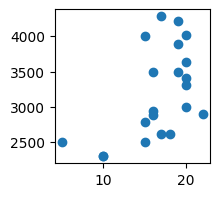

In [40]:
plt.figure(figsize=(2,2))
plt.scatter(df['age'], df['price'])
plt.show()

In [41]:
# Model Building
size= df.drop('price', axis=1)
size

,area,bedrom,age
0,129,2,10
1,159,4,5
2,200,3,20
3,131,5,10
4,300,2,15
5,174,2,22
6,332,3,16
7,345,7,16
8,417,5,20
9,366,4,20


# 20/10/23 JobLib


In [42]:
from sklearn import linear_model
import joblib
import pickle

In [43]:
reg = linear_model.LinearRegression()

In [44]:
reg.fit(df[['age']], df['price'])

LinearRegression()

In [45]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [46]:
reg = joblib.load('model_joblib')

In [47]:
reg.predict([[500]])

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43235.80907292])

In [48]:
with open('model_pickle', 'wb')as f: 
    pickle.dump(reg, f)

In [49]:
reg.coef_

array([82.83479367])

In [50]:
reg.intercept_

1818.412238552855

In [51]:
with open('model_pickle', 'rb')as a:
    reg = pickle.load(a)

In [52]:
reg.coef_

array([82.83479367])

In [53]:
reg.intercept_

1818.412238552855

In [54]:
reg.predict([[5000]])

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([415992.38058225])